In [2]:
import tarfile
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.cluster import OPTICS
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import pylab
import sklearn
import random
import hdbscan

In [3]:
def get_dataset(data_name):

    if(data_name == 'iris'):
        data = load_iris()
        return data
    
    if(data_name == 'heart'):
        data = pd.read_csv('../../data/heart_disease.csv')
        return data
    
    if(data_name == "credit fraud"):
        data = pd.read_csv('../../data/density_based_clustering_data.csv')
        return data

In [4]:
def get_tsne(X):
    X_embedded = TSNE(n_components = 2, learning_rate='auto', init='random').fit_transform(X)
    return X_embedded

In [5]:

def get_plot(X, Y):
    data_embedded_combined = pd.DataFrame(data=np.c_[X, Y], columns=['tsne-one-d', 'tsne-two-d'] + ['target'])
    sns.scatterplot(data=data_embedded_combined, x='tsne-one-d', y='tsne-two-d', hue='target')
    plt.show()
    # plt.xlim([-60,60])

In [6]:
def adjusted_rand_index(labels, clusters):
    return sklearn.metrics.adjusted_rand_score(labels, clusters)

def adjusted_mutual_information(labels, clusters):
    return sklearn.metrics.adjusted_mutual_info_score(labels, clusters)

def fowlkes_mallows_score(labels, clusters):
    return sklearn.metrics.fowlkes_mallows_score(labels, clusters)

def completeness_score(labels, clusters):
    return sklearn.metrics.completeness_score(labels, clusters)

def find_silhouette_score(X, clusters):
    return sklearn.metrics.silhouette_score(X, clusters)
    
def find_DB_Index(X, clusters):
    return sklearn.metrics.davies_bouldin_score(X, clusters)

def calinski_harabasz_index(X, clusters):
    return sklearn.metrics.calinski_harabasz_score(X, clusters)



def extrinsic_scores(labels, clusters):
    return {
        'rand_index': adjusted_rand_index(labels, clusters),
        'mutual_information': adjusted_mutual_information(labels, clusters),
        'fowlkes_mallows_score': fowlkes_mallows_score(labels, clusters),
        'completeness_score': completeness_score(labels, clusters)
    }

def intrinsic_scores(X, clusters):
    return{
        'silhouette score': find_silhouette_score(X, clusters),
         'calinski_harabasz_index': calinski_harabasz_index(X, clusters),
        'DB-Index': find_DB_Index(X, clusters)
    }

In [7]:
def perform_random_clustering(n_clusters, X):
    clusters = []
    for i in range(X.shape[0]):
        cluster_i = random.randint(0, n_clusters - 1)
        clusters.append(cluster_i)
    return clusters

IRIS-DATASET

In [40]:
iris = get_dataset('iris')
X_iris = iris.data
Y_iris = iris.target

In [41]:
X_iris_embedded = get_tsne(X_iris)

In [77]:
optics_cluster = OPTICS()
optics_cluster.fit(X_iris)
cluster_labels_iris = optics_cluster.labels_
cluster_labels_iris

array([ 0,  1,  1,  1,  0, -1,  1,  0, -1,  1, -1,  0,  1, -1, -1, -1, -1,
        0, -1, -1, -1, -1, -1, -1, -1,  1,  0,  0,  0,  1,  1, -1, -1, -1,
        1,  0, -1,  0, -1,  0,  0, -1,  1, -1, -1,  1, -1,  1,  0,  0,  3,
       -1,  3,  2,  3, -1, -1, -1,  3, -1, -1,  2, -1, -1, -1,  3, -1,  2,
       -1,  2,  5, -1, -1, -1, -1,  3,  3,  3, -1, -1,  2,  2,  2,  5, -1,
       -1,  3, -1,  2,  2,  2, -1,  2, -1,  2,  2,  2, -1, -1,  2, -1,  5,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  5, -1, -1, -1, -1, -1,
       -1,  4,  5, -1,  5,  4, -1,  5,  5, -1, -1, -1, -1, -1,  5, -1, -1,
       -1, -1,  5, -1,  4, -1,  5,  4,  4, -1, -1, -1, -1,  5])

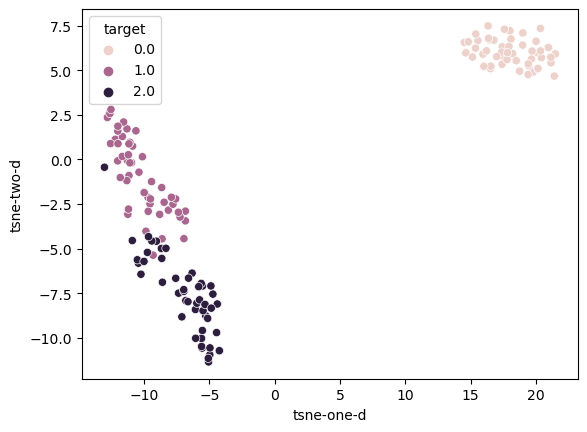

In [72]:
get_plot(X_iris_embedded, Y_iris)

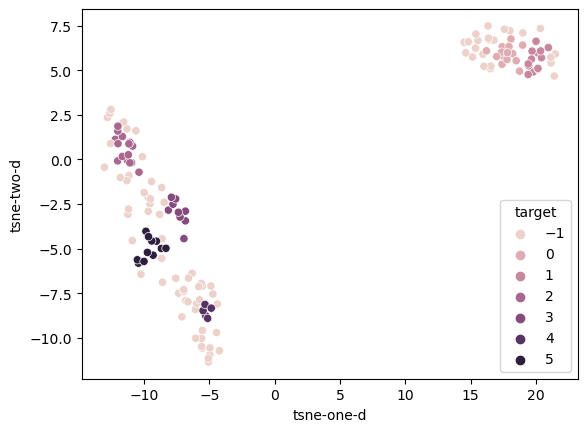

In [78]:
get_plot(X_iris_embedded, cluster_labels_iris)

In [79]:
silhouette_score(X_iris_embedded, cluster_labels_iris)

-0.17679355

CREDIT FRAUD

In [8]:
credit_data = get_dataset('credit fraud')

In [9]:
credit_data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,class
0,0.919012,0.787855,0.809517,0.429154,0.762201,0.248677,0.249897,0.800314,0.367355,0.451365,...,0.569817,0.508396,0.658525,0.425381,0.580406,0.454498,0.421331,0.310216,0.000000,1.0
1,0.906588,0.733944,0.856275,0.353384,0.774870,0.252314,0.267339,0.784658,0.453446,0.491372,...,0.572146,0.530346,0.685868,0.342644,0.593612,0.401704,0.411845,0.313850,0.020591,1.0
2,0.919163,0.785821,0.831180,0.355228,0.760185,0.262258,0.268781,0.781104,0.454573,0.477162,...,0.556737,0.466535,0.667999,0.370466,0.569143,0.336811,0.417241,0.310018,0.009339,1.0
3,0.883578,0.781591,0.792483,0.370723,0.758122,0.245862,0.244056,0.782717,0.454245,0.409378,...,0.570726,0.518287,0.658956,0.375025,0.592075,0.318049,0.401244,0.330364,0.002297,1.0
4,0.979262,0.799121,0.762821,0.461731,0.790114,0.249369,0.275794,0.780061,0.418588,0.458085,...,0.555369,0.477181,0.655679,0.162235,0.661482,0.518034,0.416326,0.316103,0.000039,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1487,0.937089,0.770585,0.901684,0.282397,0.759839,0.273992,0.267169,0.778594,0.500753,0.561202,...,0.548196,0.512732,0.661240,0.467231,0.593820,0.392082,0.418312,0.299518,0.001168,0.0
1488,0.981639,0.748612,0.829904,0.153096,0.767945,0.302480,0.252867,0.796127,0.422017,0.535171,...,0.557402,0.488500,0.664975,0.516595,0.599478,0.394814,0.417781,0.313895,0.003206,0.0
1489,0.915865,0.782060,0.840617,0.140925,0.764964,0.253942,0.266027,0.746170,0.539660,0.522670,...,0.606248,0.479013,0.674265,0.426753,0.581510,0.407393,0.428918,0.315452,0.000311,0.0
1490,0.934978,0.776967,0.823951,0.291850,0.770721,0.253380,0.268554,0.786023,0.456954,0.522965,...,0.561106,0.534003,0.673255,0.323359,0.555987,0.367218,0.419970,0.317048,0.000105,0.0


In [10]:
X_credit_data = credit_data.drop(['class'], axis = 1)
Y_credit_data = credit_data['class']
X_credit_data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.919012,0.787855,0.809517,0.429154,0.762201,0.248677,0.249897,0.800314,0.367355,0.451365,...,0.581617,0.569817,0.508396,0.658525,0.425381,0.580406,0.454498,0.421331,0.310216,0.000000
1,0.906588,0.733944,0.856275,0.353384,0.774870,0.252314,0.267339,0.784658,0.453446,0.491372,...,0.602650,0.572146,0.530346,0.685868,0.342644,0.593612,0.401704,0.411845,0.313850,0.020591
2,0.919163,0.785821,0.831180,0.355228,0.760185,0.262258,0.268781,0.781104,0.454573,0.477162,...,0.575687,0.556737,0.466535,0.667999,0.370466,0.569143,0.336811,0.417241,0.310018,0.009339
3,0.883578,0.781591,0.792483,0.370723,0.758122,0.245862,0.244056,0.782717,0.454245,0.409378,...,0.578438,0.570726,0.518287,0.658956,0.375025,0.592075,0.318049,0.401244,0.330364,0.002297
4,0.979262,0.799121,0.762821,0.461731,0.790114,0.249369,0.275794,0.780061,0.418588,0.458085,...,0.580362,0.555369,0.477181,0.655679,0.162235,0.661482,0.518034,0.416326,0.316103,0.000039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1487,0.937089,0.770585,0.901684,0.282397,0.759839,0.273992,0.267169,0.778594,0.500753,0.561202,...,0.586583,0.548196,0.512732,0.661240,0.467231,0.593820,0.392082,0.418312,0.299518,0.001168
1488,0.981639,0.748612,0.829904,0.153096,0.767945,0.302480,0.252867,0.796127,0.422017,0.535171,...,0.579539,0.557402,0.488500,0.664975,0.516595,0.599478,0.394814,0.417781,0.313895,0.003206
1489,0.915865,0.782060,0.840617,0.140925,0.764964,0.253942,0.266027,0.746170,0.539660,0.522670,...,0.575815,0.606248,0.479013,0.674265,0.426753,0.581510,0.407393,0.428918,0.315452,0.000311
1490,0.934978,0.776967,0.823951,0.291850,0.770721,0.253380,0.268554,0.786023,0.456954,0.522965,...,0.576153,0.561106,0.534003,0.673255,0.323359,0.555987,0.367218,0.419970,0.317048,0.000105


In [11]:
np.unique(Y_credit_data, return_counts = True)

(array([0., 1.]), array([1000,  492], dtype=int64))

In [12]:
X_credit_data_embedded = get_tsne(X_credit_data)

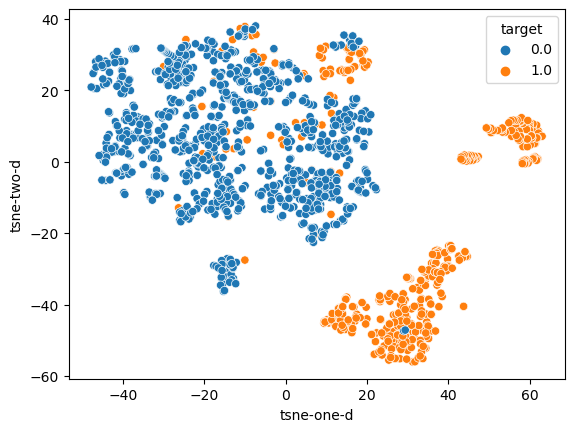

In [13]:
get_plot(X_credit_data_embedded, Y_credit_data)

[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46
 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63]
Min samples: 2


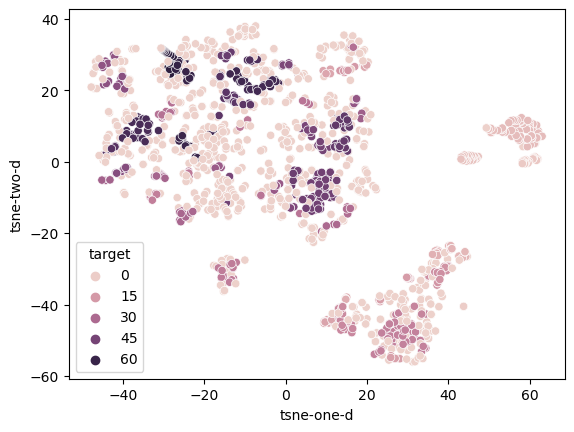

{'silhouette score': -0.10404484822021365, 'calinski_harabasz_index': 52.71867146227191, 'DB-Index': 1.6375681932545003}
{'rand_index': 0.05676017058936209, 'mutual_information': 0.19350832255934775, 'fowlkes_mallows_score': 0.4150045174444598, 'completeness_score': 0.12730728511188252}
------------------------------------------------------------------
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46
 47 48 49]
Min samples: 3


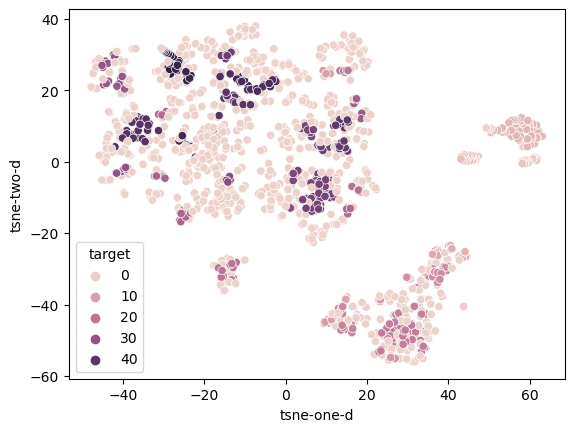

{'silhouette score': -0.14751581882237783, 'calinski_harabasz_index': 56.117986204825556, 'DB-Index': 1.6317120100224705}
{'rand_index': 0.087362332209359, 'mutual_information': 0.20199759488684843, 'fowlkes_mallows_score': 0.4839484350640325, 'completeness_score': 0.13659913374383215}
------------------------------------------------------------------
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
Min samples: 4


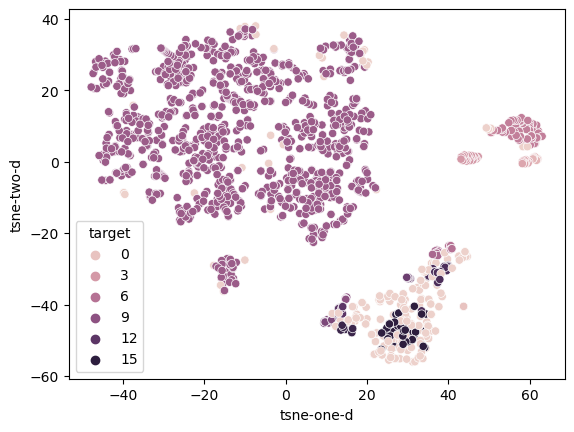

{'silhouette score': 0.2820307230579134, 'calinski_harabasz_index': 208.35343835941924, 'DB-Index': 1.5301514656573272}
{'rand_index': 0.6348893250418263, 'mutual_information': 0.43435768915906736, 'fowlkes_mallows_score': 0.833007114183345, 'completeness_score': 0.3378997615859074}
------------------------------------------------------------------
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13]
Min samples: 5


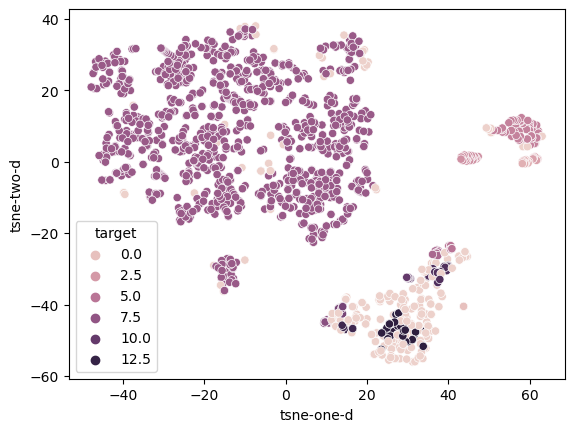

{'silhouette score': 0.257708467133935, 'calinski_harabasz_index': 207.63305921560612, 'DB-Index': 1.5370372721131171}
{'rand_index': 0.646043404872527, 'mutual_information': 0.44891249046171977, 'fowlkes_mallows_score': 0.8376764666770622, 'completeness_score': 0.3546475737896563}
------------------------------------------------------------------
[-1  0  1  2  3  4  5  6  7  8  9 10]
Min samples: 6


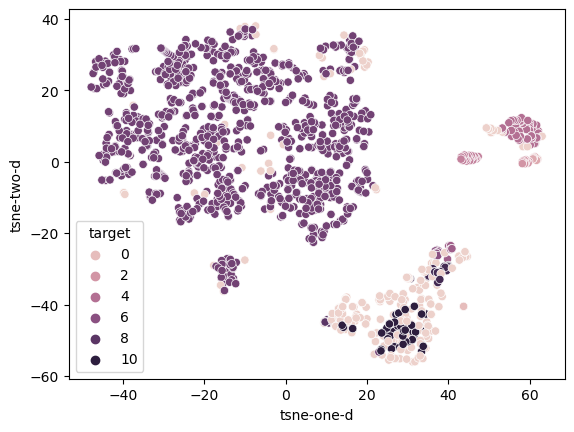

{'silhouette score': 0.2748693210172026, 'calinski_harabasz_index': 235.54628513341984, 'DB-Index': 1.702043333341103}
{'rand_index': 0.6468406206118457, 'mutual_information': 0.45912984177577126, 'fowlkes_mallows_score': 0.8376993039619663, 'completeness_score': 0.36760827641179206}
------------------------------------------------------------------
[-1  0  1  2  3  4  5  6  7]
Min samples: 7


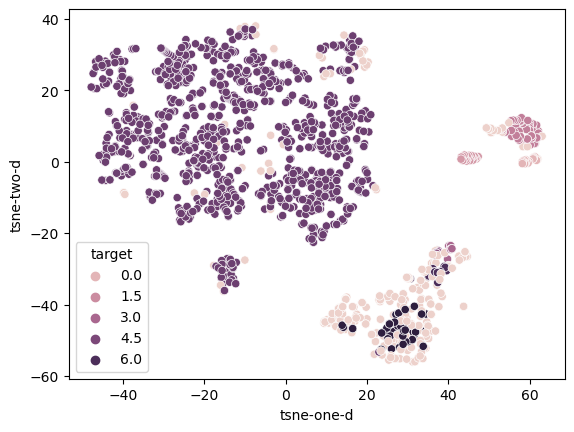

{'silhouette score': 0.2635263238814275, 'calinski_harabasz_index': 286.1753917279532, 'DB-Index': 1.9290738126922788}
{'rand_index': 0.6584597222761527, 'mutual_information': 0.4790719288902359, 'fowlkes_mallows_score': 0.8439472789557706, 'completeness_score': 0.39270758859235577}
------------------------------------------------------------------
[-1  0  1  2  3  4]
Min samples: 8


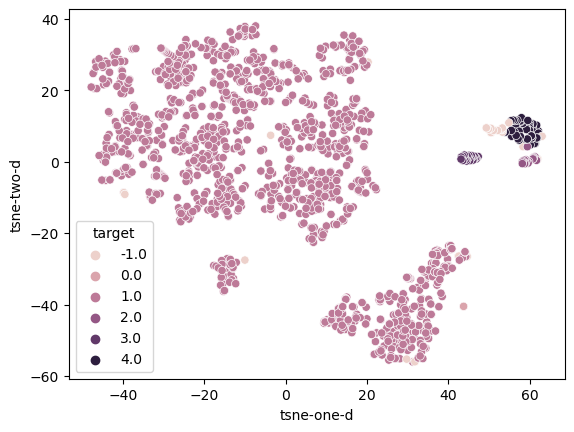

{'silhouette score': 0.5384291289283009, 'calinski_harabasz_index': 259.80174418761817, 'DB-Index': 1.3490516363891318}
{'rand_index': 0.17342482538548162, 'mutual_information': 0.17577400621911016, 'fowlkes_mallows_score': 0.744563357347495, 'completeness_score': 0.2315434264952057}
------------------------------------------------------------------
[-1  0  1  2  3  4  5  6]
Min samples: 9


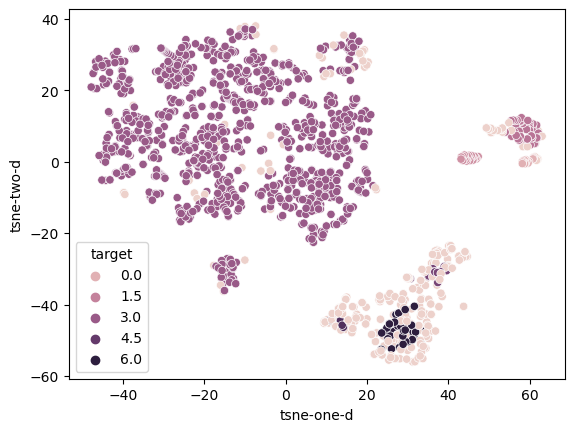

{'silhouette score': 0.22254890528315052, 'calinski_harabasz_index': 294.2293918670939, 'DB-Index': 1.8519711965250405}
{'rand_index': 0.6632734418314932, 'mutual_information': 0.48696823389283583, 'fowlkes_mallows_score': 0.8464043096643641, 'completeness_score': 0.40578303198451143}
------------------------------------------------------------------
[-1  0  1  2  3]
Min samples: 10


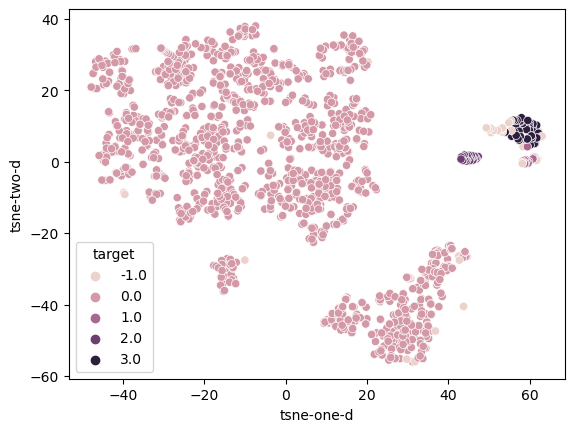

{'silhouette score': 0.5425417155587468, 'calinski_harabasz_index': 300.9349560834389, 'DB-Index': 1.5944654397806541}
{'rand_index': 0.17678042056528265, 'mutual_information': 0.17996097693300972, 'fowlkes_mallows_score': 0.7449027489274636, 'completeness_score': 0.23873112102149346}
------------------------------------------------------------------
[-1  0  1  2  3]
Min samples: 11


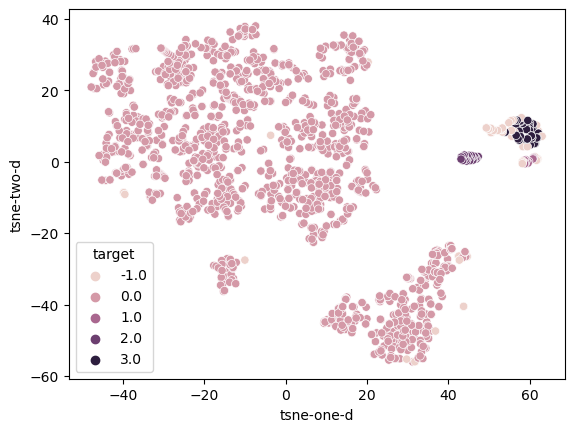

{'silhouette score': 0.5394515169665888, 'calinski_harabasz_index': 294.9216654266811, 'DB-Index': 1.608437788764133}
{'rand_index': 0.17686637765656077, 'mutual_information': 0.17986697764234064, 'fowlkes_mallows_score': 0.7449585492545397, 'completeness_score': 0.2394312003712419}
------------------------------------------------------------------
[-1  0  1  2  3]
Min samples: 12


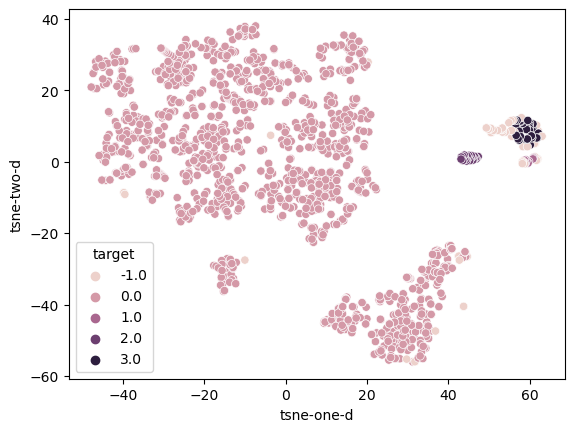

{'silhouette score': 0.5368873551460915, 'calinski_harabasz_index': 288.5739012747061, 'DB-Index': 1.6159238975838988}
{'rand_index': 0.17854869155950734, 'mutual_information': 0.18124814662557504, 'fowlkes_mallows_score': 0.7451292828244771, 'completeness_score': 0.24107564202411486}
------------------------------------------------------------------
[-1  0  1  2  3]
Min samples: 13


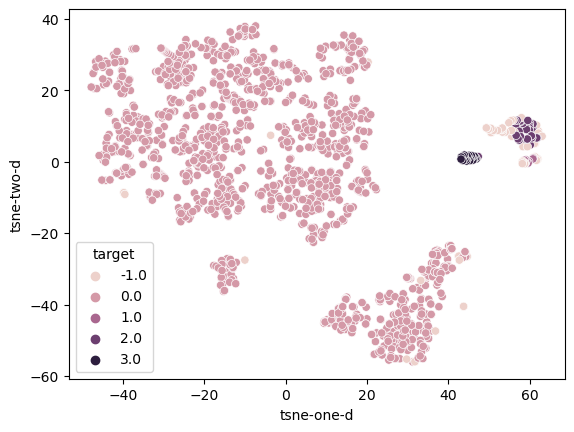

{'silhouette score': 0.5340891807400526, 'calinski_harabasz_index': 285.36496885613803, 'DB-Index': 1.6413547751265898}
{'rand_index': 0.18034389435160533, 'mutual_information': 0.18298672376958777, 'fowlkes_mallows_score': 0.745358061531137, 'completeness_score': 0.2438644884119106}
------------------------------------------------------------------
[-1  0  1  2]
Min samples: 14


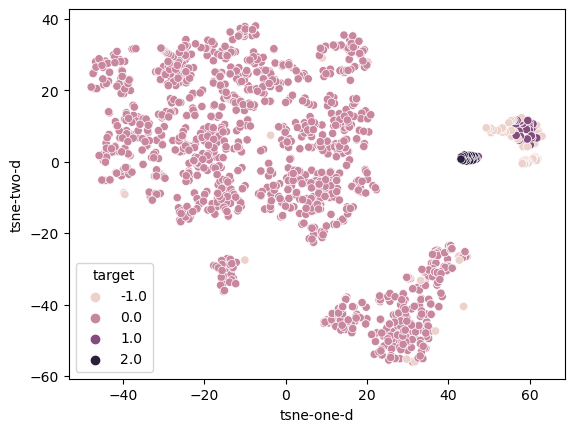

{'silhouette score': 0.5361037899215523, 'calinski_harabasz_index': 367.4785159411911, 'DB-Index': 1.6229154160363266}
{'rand_index': 0.18266987587354822, 'mutual_information': 0.18740899756719365, 'fowlkes_mallows_score': 0.7458696938468526, 'completeness_score': 0.254425676330808}
------------------------------------------------------------------
[-1  0  1  2  3  4  5]
Min samples: 15


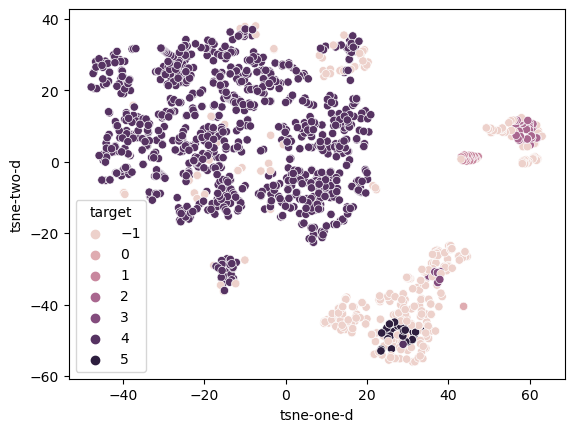

{'silhouette score': 0.182060670004201, 'calinski_harabasz_index': 258.0138732906605, 'DB-Index': 1.721726755803821}
{'rand_index': 0.6709647639914684, 'mutual_information': 0.4985035453430032, 'fowlkes_mallows_score': 0.8498996465166379, 'completeness_score': 0.4278126880559055}
------------------------------------------------------------------
[-1  0  1]
Min samples: 16


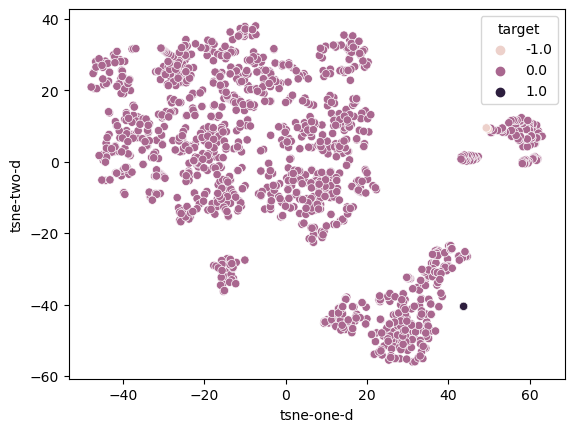

{'silhouette score': 0.4800031360708778, 'calinski_harabasz_index': 25.795354755085388, 'DB-Index': 0.3957568563695879}
{'rand_index': 0.011115352362809035, 'mutual_information': 0.015398713273167981, 'fowlkes_mallows_score': 0.7460893528420027, 'completeness_score': 0.16187495732243062}
------------------------------------------------------------------
[-1  0  1  2  3  4  5]
Min samples: 17


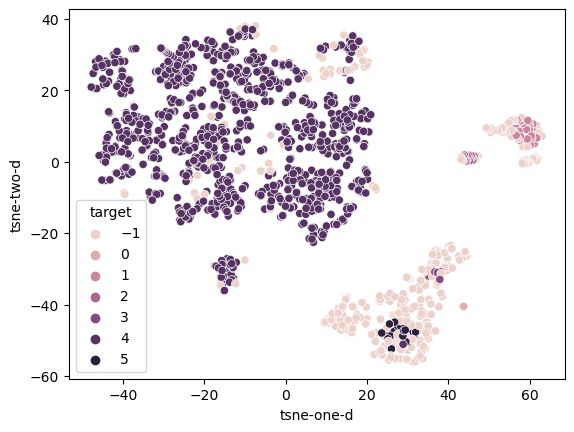

{'silhouette score': 0.1760845925620413, 'calinski_harabasz_index': 248.3794808192566, 'DB-Index': 1.687522205512979}
{'rand_index': 0.6713952493203175, 'mutual_information': 0.49951944121788416, 'fowlkes_mallows_score': 0.8502198300242929, 'completeness_score': 0.43178166539935775}
------------------------------------------------------------------
[-1  0  1  2  3  4  5]
Min samples: 18


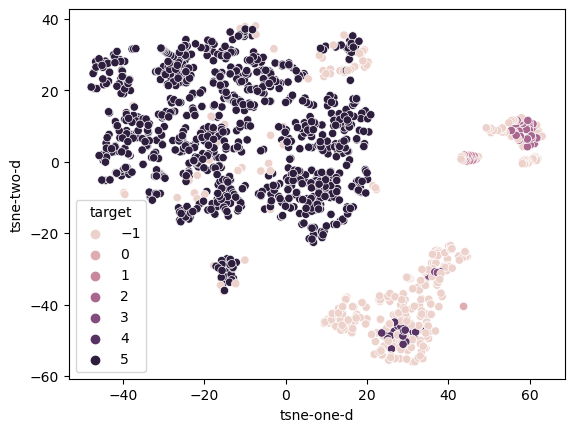

{'silhouette score': 0.1719486359892388, 'calinski_harabasz_index': 249.16227850372783, 'DB-Index': 1.6749935036674672}
{'rand_index': 0.6716728123478217, 'mutual_information': 0.5004259716742077, 'fowlkes_mallows_score': 0.8500107484079509, 'completeness_score': 0.4324597953580592}
------------------------------------------------------------------
[-1  0  1  2  3  4  5]
Min samples: 19


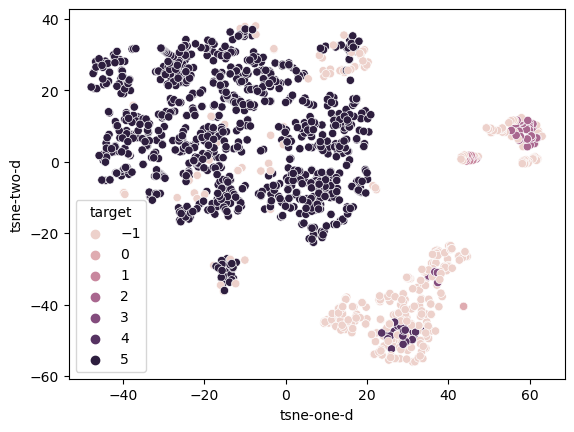

{'silhouette score': 0.16736217008646107, 'calinski_harabasz_index': 243.28438024866222, 'DB-Index': 1.7211055125486827}
{'rand_index': 0.6702059311195366, 'mutual_information': 0.49953438240868714, 'fowlkes_mallows_score': 0.849140496440292, 'completeness_score': 0.4320176629686761}
------------------------------------------------------------------
[-1  0  1  2  3  4  5]
Min samples: 20


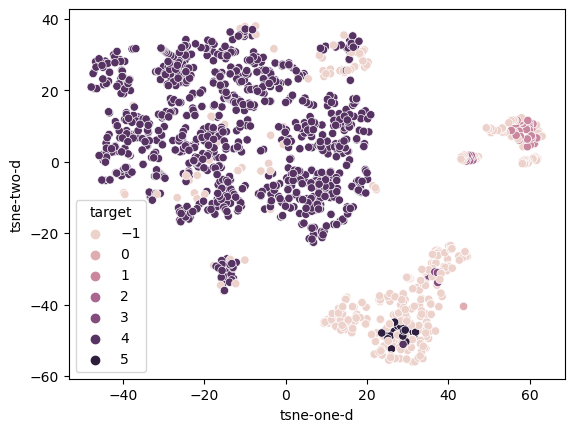

{'silhouette score': 0.1650240924525369, 'calinski_harabasz_index': 237.60228433705183, 'DB-Index': 1.7074798256471106}
{'rand_index': 0.667095323166371, 'mutual_information': 0.4972648155637009, 'fowlkes_mallows_score': 0.8479846970739084, 'completeness_score': 0.4327829287215363}
------------------------------------------------------------------


In [15]:
silhouette_score_list = []
DB_index_list = []
rand_index_list = []
mutual_info_list = []
min_samples = range(2,21)
min_cluster_size = range(2,6)
for min_sampl in min_samples:
    # for clust_size in min_cluster_size:
    clusterer = hdbscan.HDBSCAN(min_samples = min_sampl)
    clusterer.fit(X_credit_data)
    cluster_labels_credit = clusterer.labels_
    print(np.unique(cluster_labels_credit))

    print("Min samples: " + str(min_sampl))
    if(len(np.unique(cluster_labels_credit)) == 1):
        print("Bad Case")
        continue
    get_plot(X_credit_data_embedded, cluster_labels_credit)
    intrin = intrinsic_scores(X_credit_data, cluster_labels_credit)
    extrin = extrinsic_scores(Y_credit_data, cluster_labels_credit)
    print(intrin)
    print(extrin)
            
    silhouette_score_list.append(intrin['silhouette score'])
    DB_index_list.append(intrin['DB-Index'])
    rand_index_list.append(extrin['rand_index'])
    mutual_info_list.append(extrin['mutual_information'])
    print("------------------------------------------------------------------")